In [153]:
# Llibreries bàsiques
import pandas as pd
import numpy as np
import re
import datetime
# Llibreries visualització
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

#Altres
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings('ignore')

In [154]:
txn = pd.read_csv('transactions_hist_nou.csv')

In [155]:
txn['Date'] = pd.to_datetime(txn['Date']) 

In [156]:
txn.set_index('Date', inplace=True)

In [157]:
txn

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close,High,Low,Variance
Date,,,,,,,,,,,
2021-06-30,7051,Offered,NaN,NaN,60707.68,26.69,0x9e1893,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,6263,Bid withdrawn,0x12D715,NaN,38667.31,17.00,0x6feee6,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,9400,Offer withdrawn,NaN,NaN,NaN,NaN,0xf18631,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,6493,Offered,NaN,NaN,45354.48,19.94,0xb07068,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,6281,Transfer,0x8F8B47,0x63d4a5,NaN,NaN,0xd09776,2274.55,2282.989014,2090.760742,192.228272
...,...,...,...,...,...,...,...,...,...,...,...
2017-06-23,3029,Claimed,NaN,0xe4d36b,NaN,NaN,0x218fdb,341.74,348.006012,334.989990,13.016022
2017-06-23,8419,Claimed,NaN,0x6f4a2d,NaN,NaN,0x82a4ad,341.74,348.006012,334.989990,13.016022
2017-06-23,8420,Claimed,NaN,0xcc7c33,NaN,NaN,0x82a4ad,341.74,348.006012,334.989990,13.016022


In [26]:
profile = ProfileReport(txn, title="Cryptopunks Nou Transactions History profile report", minimal =True)

In [27]:
profile.to_file('nou_profile_output.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Mirar duplicats, perquè no em surten duplicats?

In [158]:
txn.duplicated().value_counts()

False    133582
True        207
dtype: int64

Mirem els que en principi són duplicats:

In [159]:
txn[txn.duplicated()]

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close,High,Low,Variance
Date,,,,,,,,,,,
2021-06-28,9720,Offer withdrawn,NaN,NaN,NaN,NaN,0x717f48,2079.66,2139.805420,1963.615479,176.189941
2021-06-28,9720,Sold,0xB5fC89,0x62cb05,3.431435e+04,1.650000e+01,0x717f48,2079.66,2139.805420,1963.615479,176.189941
2021-06-28,4831,Offered,NaN,NaN,4.013739e+04,1.930000e+01,0xb93fde,2079.66,2139.805420,1963.615479,176.189941
2021-06-27,4905,Offered,NaN,NaN,4.947237e+04,2.500000e+01,0x52c9a5,1978.89,1979.958130,1811.245850,168.712280
2021-06-27,8951,Offer withdrawn,NaN,NaN,NaN,NaN,0x1fcefa,1978.89,1979.958130,1811.245850,168.712280
2021-06-27,8951,Transfer,0x60A0dB,0x20a6f2,NaN,NaN,0x1fcefa,1978.89,1979.958130,1811.245850,168.712280
2021-06-19,9190,Bid,0x5e598D,NaN,4.030223e+04,1.850000e+01,0xe56d0c,2178.50,2278.415039,2168.885010,109.530029
2021-06-09,7242,Transfer (Wrap),0xf0A09a,0xb7f7f6,NaN,NaN,0x2fad58,2608.27,2625.070557,2412.197754,212.872803
2021-06-08,1870,Offer withdrawn,NaN,NaN,NaN,NaN,0x15128a,2517.44,2620.846191,2315.546631,305.299560


## 1. Estudi de nuls

Tenim 44148 transaccions sense valor monetari, anem a estudiar perquè, a quin tipus estan asociades. Comencem per Adj Close, que no ens permetria treure el valor en dolars de les files en que sigui nul i veiem perquè:

In [106]:
# Nuls en Adj Close:
adj_nuls = txn[txn['Adj Close'].isna()].sort_values(by='Date', ascending = False)

In [107]:
adj_nuls

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close
Date,,,,,,,,
2020-10-13,3107,Bid withdrawn,0xCf0E9b,NaN,NaN,21.00,0xd8620c,NaN
2020-10-13,5071,Transfer,0xf11dFe,0xb7d53f,NaN,NaN,0xedcd70,NaN
2020-10-13,8530,Offered,NaN,NaN,NaN,12.00,0xb43e21,NaN
2020-10-13,8845,Offered,NaN,NaN,NaN,9.25,0xdc3b37,NaN
2020-10-13,2831,Offered,NaN,NaN,NaN,8.00,0x0a741b,NaN
...,...,...,...,...,...,...,...,...
2020-04-17,8820,Offered,NaN,NaN,NaN,1.97,0x4790d5,NaN
2020-04-17,8820,Offer withdrawn,NaN,NaN,NaN,NaN,0xbfdb30,NaN
2020-04-17,8820,Transfer,0x677B43,0x1a96af,NaN,NaN,0xbfdb30,NaN


Els 876 nuls que tenim a Adj Close pertanyen a 4 dies dels quals no tenim dades del valor de ethereum en dolar des del principi

In [109]:
adj_nuls.index.unique()

DatetimeIndex(['2020-10-13', '2020-10-12', '2020-10-09', '2020-04-17'], dtype='datetime64[ns]', name='Date', freq=None)

In [117]:
adj_nuls.index.value_counts()

2020-04-17    396
2020-10-09    199
2020-10-13    156
2020-10-12    123
Name: Date, dtype: int64

In [70]:
# Nuls en ethereum
txn['Amount_eth'].isna().sum()

44148

In [112]:
eth_nuls = txn[txn['Amount_eth'].isna()].sort_values(by='Date', ascending = False)

In [144]:
eth_nuls['Type'].value_counts(normalize=True)

Offer withdrawn      0.418139
Transfer             0.250997
Claimed              0.226511
Transfer (Wrap)      0.055201
Transfer (Unwrap)    0.049153
Name: Type, dtype: float64

In [145]:
txn['Type'].value_counts(normalize=True)

Offered              0.326028
Bid                  0.159146
Offer withdrawn      0.137978
Sold                 0.093476
Bid withdrawn        0.091368
Transfer             0.082824
Claimed              0.074745
Transfer (Wrap)      0.018215
Transfer (Unwrap)    0.016220
Name: Type, dtype: float64

In [71]:
# Nuls en dolars
txn['Amount_dolars'].isna().sum()

44613

In [122]:
dolars_nuls = txn[txn['Amount_dolars'].isna()].sort_values(by='Date', ascending = False)

Observant els percentatgesi comparant-los amb els nuls d'ethereum veiem que els nuls en dolars són els mateixos que en ethereum més els de Adj Close que no coincideixen amb els d'ethereum.

In [123]:
dolars_nuls['Type'].value_counts(normalize=True)

Offer withdrawn      0.413799
Transfer             0.248392
Claimed              0.224160
Transfer (Wrap)      0.054628
Transfer (Unwrap)    0.048643
Offered              0.006411
Bid                  0.001659
Bid withdrawn        0.001255
Sold                 0.001054
Name: Type, dtype: float64

## 2. Anàlisis descriptiu

### 2.1 Categòriques

#### 2.1.1 Tipus de transaccions ('Type')

Comencem l'anàlisis descriptiu amb les variables categòriques, primer amb el tipus de transaccions, per tenir una idea de amb què estem treballant:

In [31]:
txn['Type'].value_counts()

Offered              43621
Bid                  21292
Offer withdrawn      18460
Sold                 12506
Bid withdrawn        12224
Transfer             11081
Claimed              10000
Transfer (Wrap)       2437
Transfer (Unwrap)     2170
Name: Type, dtype: int64

In [35]:
x = txn['Type'].value_counts().keys()
y = txn['Type'].value_counts().values

<BarContainer object of 9 artists>

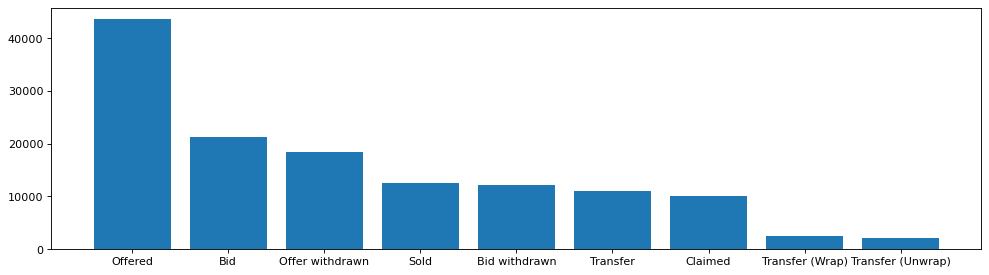

In [43]:
from matplotlib.pyplot import figure

figure(figsize=(15, 4), dpi=80)
plt.bar(x, y)

Busquem el significat especific de cada tipus. 'Offered' vol dir 'posat en venta', a un usuari en concret, o (més frequentment) al públic en general:

In [134]:
txn[txn['Type'] == 'Offered'].isna().sum()

Number                  0
Type                    0
From                43619
To                  43235
Amount_dolars         286
Amount_eth              0
user_transaction        0
Adj Close             286
dtype: int64

Com veiem el tipo 'transfer' no comporta cap intercanvi monetari, només la transacció del punk d'un usuari a un altre:

In [127]:
txn[txn['Type'] == 'Transfer'].describe()

,Number,Amount_dolars,Amount_eth,Adj Close
count,11081.000000,0.0,0.0,10926.000000
mean,5104.103871,NaN,NaN,1420.109367
std,2935.613405,NaN,NaN,1069.330356
min,0.000000,NaN,NaN,84.440000
25%,2463.000000,NaN,NaN,364.840000
50%,5226.000000,NaN,NaN,1376.120000
75%,7672.000000,NaN,NaN,2093.120000
max,9999.000000,NaN,NaN,4168.700000


Withdrawn tampoc comporta cap intercanvi monetari:

In [149]:
txn[txn['Type'] == 'Offer withdrawn'].describe()

,Number,Amount_dolars,Amount_eth,Adj Close
count,18460.000000,0.0,0.0,18262.000000
mean,5435.392037,NaN,NaN,1244.840764
std,2656.980832,NaN,NaN,1002.927701
min,1.000000,NaN,NaN,84.310000
25%,3186.000000,NaN,NaN,282.900000
50%,5428.000000,NaN,NaN,1298.100000
75%,7707.250000,NaN,NaN,1935.600000
max,9999.000000,NaN,NaN,4168.700000


In [152]:
round(txn[txn['Type'] == 'Sold'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close
count,12506.00,12459.00,12506.00,12459.00
mean,5374.22,29360.04,14.79,1205.79
std,2663.05,112284.38,59.16,974.61
min,0.00,0.00,0.00,84.44
25%,3125.00,134.18,0.60,273.30
50%,5354.00,6784.44,6.50,1230.99
75%,7658.00,42714.17,21.95,1854.56
max,9998.00,7670018.77,4200.00,4168.70


La mitjana del preu històric de venta en dolars és 29.360,04. El mínim són 0 i el màxim 7.670.018,77, amb una desviació estàndar de 112.284,38. El 50 percentil del preu històric de venta en dolars es troba als 6.784,11, amb el 25 percentil a 134,18 i el 75 a 42.714,17.

La mitjana del preu històric de venta en Ethereum és 59,16. El mínim són 0 i el màxim 4200, amb una desviació estàndar de 59,16. El 50 percentil del preu històric de venta en dolars es troba als 6,5. El 25 percentil a 0.6 i el 75 a 21,95.

In [161]:
round(txn[txn['Type'] == 'Bid withdrawn'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,12224.00,12168.00,12224.00,12168.00,12168.00,12168.00,12168.00
mean,5124.67,38579.52,19.28,1302.21,1349.62,1233.59,116.03
std,2865.53,142951.14,73.48,990.25,1031.10,932.39,136.53
min,0.00,0.00,0.00,84.44,85.34,82.83,1.22
25%,2698.00,212.99,0.70,302.88,316.09,276.62,18.75
50%,5204.00,5924.32,6.25,1382.27,1405.74,1290.60,85.66
75%,7611.00,42402.71,21.00,1937.45,1974.26,1848.21,163.03
max,9999.00,6429676.76,3100.00,4168.70,4362.35,3785.85,1485.48


In [168]:
round(txn[txn['Type'] == 'Bid'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,21292.00,21218.00,21292.00,21218.00,21218.00,21218.00,21218.00
mean,5124.97,30623.29,15.56,1155.12,1196.17,1092.83,103.35
std,2853.34,127160.69,65.70,957.91,993.34,903.86,120.49
min,0.00,0.00,0.00,88.95,92.78,83.47,1.22
25%,2716.00,64.53,0.22,282.90,311.46,265.51,23.56
50%,5152.50,1690.91,3.30,923.56,926.43,809.93,67.89
75%,7577.00,36499.33,19.00,1823.45,1860.97,1749.18,140.15
max,9999.00,7670018.77,4200.00,4168.70,4362.35,3785.85,1485.48


In [177]:
round(txn[txn['Type'] == 'Offered'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,43619.00,4.333300e+04,4.361900e+04,43333.00,43333.00,43333.00,43333.00
mean,5439.00,1.782283e+59,6.364113e+55,1450.37,1503.24,1374.14,129.10
std,2698.77,7.682777e+60,2.712412e+57,1052.75,1097.01,989.84,144.45
min,0.00,0.000000e+00,0.000000e+00,84.31,87.14,83.23,1.22
25%,3175.00,7.510200e+02,2.750000e+00,341.79,347.89,329.34,21.53
50%,5518.00,3.743076e+04,2.000000e+01,1654.74,1725.11,1561.85,93.61
75%,7750.00,7.505406e+04,3.447000e+01,2088.57,2139.81,2007.11,176.19
max,9999.00,4.511097e+62,1.157903e+59,4168.70,4362.35,3785.85,1485.48


#### Conclusions tipus de transaccions:

Podem dividir el tipus de transacció de punks entre usuaris per si van acompanyades d'un valor monetari o no. Per una banda tenim les transaccions amb un preu: 'Offered', 'Bid', 'Sold' i 'Bid withdrawn'. Per altra banda les transaccions o operacions sense preu: 'Offer withdrawn', 'Transfer', 'Claimed', 'Transfer (Wrap)' i 'Transfer (Unwrap)'. 

    - Offered:              43619 (32,6%), Preu
    - Bid:                  21292 (15,91%), Preu
    - Offer withdrawn:      18460 (13,8%), sense Preu
    - Sold:                 12506 (9.35%), Preu
    - Bid withdrawn:        12224 (9,14%), Preu
    - Transfer:             11081 (8,28%), sense Preu
    - Claimed:              10000 (7,47%), sense Preu
    - Transfer (Wrap):       2437 (1,82%), sense Preu
    - Transfer (Unwrap):     2170 (1,62%), sense Preu
    
Principalment a nosaltres ens interessen aquelles que venen acompanyades d'un preu, tot i que també pot ser interessant investigar perquè es donen certes transaccions i com varia el preu dels punks després d'una transacció. 

### 2.2 Numèriques

In [59]:
round(txn.describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close
count,133791.00,8.917800e+04,8.964300e+04,132915.00
mean,5294.32,8.660394e+58,3.096686e+55,1254.03
std,2767.76,5.356193e+60,1.892318e+57,1026.61
min,0.00,0.000000e+00,0.000000e+00,84.31
25%,2978.00,2.503800e+02,1.000000e+00,341.74
50%,5332.00,1.451436e+04,1.200000e+01,1230.17
75%,7668.00,5.569008e+04,2.650000e+01,1924.69
max,9999.00,4.511097e+62,1.157903e+59,4168.70


#### 2.2.1 Numero de transaccions per la id dels punks ('Number'.value_counts())

(array([6.245e+03, 2.073e+03, 9.770e+02, 4.010e+02, 1.770e+02, 7.300e+01,
        2.400e+01, 2.100e+01, 7.000e+00, 2.000e+00]),
 array([7.47445605e-06, 9.71679286e-05, 1.86861401e-04, 2.76554874e-04,
        3.66248346e-04, 4.55941819e-04, 5.45635291e-04, 6.35328764e-04,
        7.25022237e-04, 8.14715709e-04, 9.04409182e-04]),
 <BarContainer object of 10 artists>)

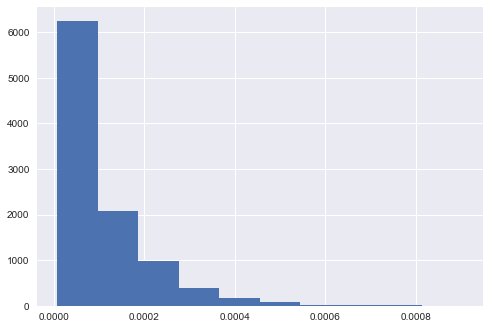

In [194]:
plt.hist(txn['Number'].value_counts(normalize=True))

Text(0, 0.5, 'Number of punks')

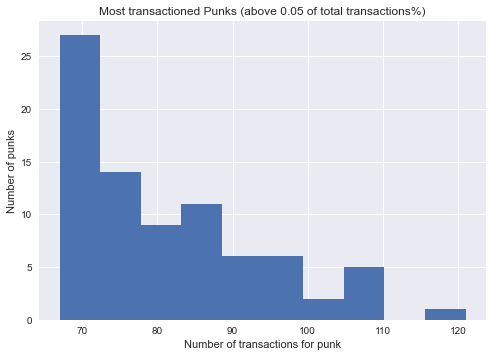

In [201]:
plt.hist(txn['Number'].value_counts()[txn['Number'].value_counts(normalize=True) > 0.0005])
plt.title('Most transactioned Punks (above 0.05 of total transactions%)')
plt.xlabel('Number of transactions for punk')
plt.ylabel('Number of punks')

In [198]:
txn['Number'].value_counts().describe()

count    10000.000000
mean        13.378900
std         13.864067
min          1.000000
25%          4.000000
50%          8.000000
75%         19.000000
max        121.000000
Name: Number, dtype: float64

#### Conclusions n transaccions per punk
Si normalitzem les dades de la variable 'number' o id_punk i les visualitzem en forma de histograma observem que té una distribució molt 'skewed', en forma inversament logarítmica. Agafant només els ids que suposin almenys un 0.05% de les transaccions totals, els valors únics redueixen molt i la forma de les dades agafa un pendent menys pronunciat.

D'això en podem concloure que, a accepció de pocs punks, la majoria té un nombre semblant de transaccions. La mitjana es troba a les 13,38 transaccions per punk, amb una desviació estàndar de 13,86. El mínim és 1 amb un màxim de 121, trobant el 25è percentil a 4, el 50è a 8 i el 75è a 19. Hi ha un gran salt entre l'interquartil i el màxim.

#### 2.2.2 Preu en dolars

#### 2.2.3 Preu en Ethereums

#### 2.2.4 Adj. Close (ETH-Dolar)

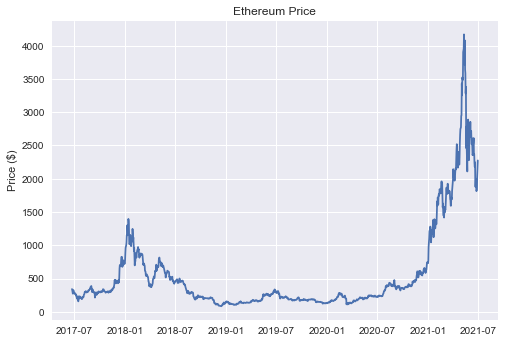

In [110]:
plt.style.use('seaborn')
plt.plot(txn.index, txn['Adj Close'])
plt.title('Ethereum Price')
plt.ylabel('Price ($)');
plt.show()

In [84]:
txn['Date']

0         2021-05-10
1         2021-04-11
2         2021-03-03
3         2021-02-21
4         2020-09-16
             ...    
133786    2017-07-03
133787    2017-06-27
133788    2017-06-24
133789    2017-06-24
133790    2017-06-23
Name: Date, Length: 133791, dtype: object

In [85]:
txn['Adj Close']

0         3952.29
1         2157.66
2         1575.85
3         1935.60
4          365.81
           ...   
133786     282.90
133787     293.09
133788     323.70
133789     323.70
133790     341.74
Name: Adj Close, Length: 133791, dtype: float64

In [116]:
# per comparar dates
d1 = datetime.datetime(2017, 1, 1)
txn[txn.index>d1]

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close
Date,,,,,,,,
2021-06-30,7051,Offered,NaN,NaN,60707.68,26.69,0x9e1893,2274.55
2021-06-30,6263,Bid withdrawn,0x12D715,NaN,38667.31,17.00,0x6feee6,2274.55
2021-06-30,9400,Offer withdrawn,NaN,NaN,NaN,NaN,0xf18631,2274.55
2021-06-30,6493,Offered,NaN,NaN,45354.48,19.94,0xb07068,2274.55
2021-06-30,6281,Transfer,0x8F8B47,0x63d4a5,NaN,NaN,0xd09776,2274.55
...,...,...,...,...,...,...,...,...
2017-06-23,3029,Claimed,NaN,0xe4d36b,NaN,NaN,0x218fdb,341.74
2017-06-23,8419,Claimed,NaN,0x6f4a2d,NaN,NaN,0x82a4ad,341.74
2017-06-23,8420,Claimed,NaN,0xcc7c33,NaN,NaN,0x82a4ad,341.74
